In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
directory = os.getcwd()

OG = pd.read_csv(directory + '/input_data.csv', sep=',')

In [3]:
OG.columns

Index(['INITIAL_SEVERITY_LEVEL_CODE', 'DISPATCH_RESPONSE_SECONDS_QY',
       'INCIDENT_RESPONSE_SECONDS_QY', 'INCIDENT_TRAVEL_TM_SECONDS_QY',
       'HELD_INDICATOR', 'T0', 'T1', 'T3', 'T4', 'T5',
       ...
       'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8',
       'Month_9', 'Month_10', 'Month_11', 'Month_12'],
      dtype='object', length=604)

In [4]:
data_wrk = OG.copy()


# Random Forest Classifier

Inherintly multi-class, but not all funtions work for it.

In [5]:
from sklearn.ensemble import RandomForestClassifier

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
from sklearn.metrics import roc_curve, auc

## 50,000 samples

In [82]:
np.random.seed(2019)

for i in [5,12,25,41]:
    max = 1025
    bin_width = max/i
    bins = np.arange(0,max+bin_width,bin_width)
    labels = list(range(1,i+1))

    data_wrk = OG.copy()
    data_wrk = data_wrk.drop(['DISPATCH_RESPONSE_SECONDS_QY'],1)
    data_wrk['INCIDENT_TRAVEL_TM_SECONDS_QY_Bin'] = pd.cut(data_wrk['INCIDENT_TRAVEL_TM_SECONDS_QY'],bins,labels=labels)
    data = data_wrk.drop(columns = ['INCIDENT_TRAVEL_TM_SECONDS_QY'])

    X = data.drop(columns = ["INCIDENT_TRAVEL_TM_SECONDS_QY_Bin"])
    Y = data["INCIDENT_TRAVEL_TM_SECONDS_QY_Bin"]

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.75)
    
    rf_def = RandomForestClassifier(criterion='entropy', n_estimators=100)
    rf_def = rf_def.fit(X_train, Y_train)
    rf_pred = rf_def.predict(X_test)
    print("Accuracy:", i, str(rf_def.score(X_test, Y_test)))

Accuracy: 5 0.91072
Accuracy: 12 0.75048
Accuracy: 25 0.48808
Accuracy: 41 0.31272


# 25,000 samples

In [83]:
np.random.seed(2019)

for i in [5,12,25,41]:
    max = 1025
    bin_width = max/i
    bins = np.arange(0,max+bin_width,bin_width)
    labels = list(range(1,i+1))

    data_wrk = OG.sample(n = 25000)
    data_wrk = data_wrk.drop(['DISPATCH_RESPONSE_SECONDS_QY'],1)
    data_wrk['INCIDENT_TRAVEL_TM_SECONDS_QY_Bin'] = pd.cut(data_wrk['INCIDENT_TRAVEL_TM_SECONDS_QY'],bins,labels=labels)
    data = data_wrk.drop(columns = ['INCIDENT_TRAVEL_TM_SECONDS_QY'])

    X = data.drop(columns = ["INCIDENT_TRAVEL_TM_SECONDS_QY_Bin"])
    Y = data["INCIDENT_TRAVEL_TM_SECONDS_QY_Bin"]

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.75)
    
    rf_def = RandomForestClassifier(criterion='entropy', n_estimators=100)
    rf_def = rf_def.fit(X_train, Y_train)
    rf_pred = rf_def.predict(X_test)
    print("Accuracy:", i, str(rf_def.score(X_test, Y_test)))

Accuracy: 5 0.8872
Accuracy: 12 0.71488
Accuracy: 25 0.46304
Accuracy: 41 0.2824


# 10,000 samples

In [84]:
np.random.seed(2019)

for i in [5,12,25,41]:
    max = 1025
    bin_width = max/i
    bins = np.arange(0,max+bin_width,bin_width)
    labels = list(range(1,i+1))

    data_wrk = OG.sample(n = 10000)
    data_wrk = data_wrk.drop(['DISPATCH_RESPONSE_SECONDS_QY'],1)
    data_wrk['INCIDENT_TRAVEL_TM_SECONDS_QY_Bin'] = pd.cut(data_wrk['INCIDENT_TRAVEL_TM_SECONDS_QY'],bins,labels=labels)
    data = data_wrk.drop(columns = ['INCIDENT_TRAVEL_TM_SECONDS_QY'])

    X = data.drop(columns = ["INCIDENT_TRAVEL_TM_SECONDS_QY_Bin"])
    Y = data["INCIDENT_TRAVEL_TM_SECONDS_QY_Bin"]

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.75)
    
    rf_def = RandomForestClassifier(criterion='entropy', n_estimators=100)
    rf_def = rf_def.fit(X_train, Y_train)
    rf_pred = rf_def.predict(X_test)
    print("Accuracy:", i, str(rf_def.score(X_test, Y_test)))

Accuracy: 5 0.8624
Accuracy: 12 0.6876
Accuracy: 25 0.3756
Accuracy: 41 0.2096


# 5,000 samples

In [85]:
np.random.seed(2019)

for i in [5,12,25,41]:
    max = 1025
    bin_width = max/i
    bins = np.arange(0,max+bin_width,bin_width)
    labels = list(range(1,i+1))

    data_wrk = OG.sample(n = 5000)
    data_wrk = data_wrk.drop(['DISPATCH_RESPONSE_SECONDS_QY'],1)
    data_wrk['INCIDENT_TRAVEL_TM_SECONDS_QY_Bin'] = pd.cut(data_wrk['INCIDENT_TRAVEL_TM_SECONDS_QY'],bins,labels=labels)
    data = data_wrk.drop(columns = ['INCIDENT_TRAVEL_TM_SECONDS_QY'])

    X = data.drop(columns = ["INCIDENT_TRAVEL_TM_SECONDS_QY_Bin"])
    Y = data["INCIDENT_TRAVEL_TM_SECONDS_QY_Bin"]

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.75)
    
    rf_def = RandomForestClassifier(criterion='entropy', n_estimators=100)
    rf_def = rf_def.fit(X_train, Y_train)
    rf_pred = rf_def.predict(X_test)
    print("Accuracy:", i, str(rf_def.score(X_test, Y_test)))

Accuracy: 5 0.8384
Accuracy: 12 0.6352
Accuracy: 25 0.3872
Accuracy: 41 0.1792


# 1,000 Samples

In [86]:
np.random.seed(2019)

for i in [5,12,25,41]:
    max = 1025
    bin_width = max/i
    bins = np.arange(0,max+bin_width,bin_width)
    labels = list(range(1,i+1))

    data_wrk = OG.sample(n = 1000)
    data_wrk = data_wrk.drop(['DISPATCH_RESPONSE_SECONDS_QY'],1)
    data_wrk['INCIDENT_TRAVEL_TM_SECONDS_QY_Bin'] = pd.cut(data_wrk['INCIDENT_TRAVEL_TM_SECONDS_QY'],bins,labels=labels)
    data = data_wrk.drop(columns = ['INCIDENT_TRAVEL_TM_SECONDS_QY'])

    X = data.drop(columns = ["INCIDENT_TRAVEL_TM_SECONDS_QY_Bin"])
    Y = data["INCIDENT_TRAVEL_TM_SECONDS_QY_Bin"]

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.75)
    
    rf_def = RandomForestClassifier(criterion='entropy', n_estimators=100)
    rf_def = rf_def.fit(X_train, Y_train)
    rf_pred = rf_def.predict(X_test)
    print("Accuracy:", i, str(rf_def.score(X_test, Y_test)))

Accuracy: 5 0.7
Accuracy: 12 0.52
Accuracy: 25 0.24
Accuracy: 41 0.104


In [87]:
RF5 = [.7,.8384, .8624, .8872, .91072]
RF12 = [.52, .6352, .6876, .71488, .75048]
RF25 = [.24, .3872, .3756, .46304, .48808]
RF41 = [.104, .1792, .2096, .2824, .31272]

In [96]:
frames = [RF5, RF12, RF25, RF41]

summary_df = pd.DataFrame(frames, index = ['RF5', 'RF12', 'RF25', 'RF41'], columns=['1k', '5k', '10k', '25k', '50k'])

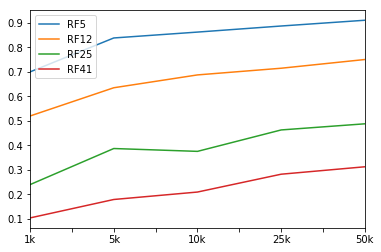

In [101]:
summary_df.transpose().plot()

## Hyper Parameter Tuning

In [102]:
i = 5
max = 1025
bin_width = max/i
bins = np.arange(0,max+bin_width,bin_width)
labels = list(range(1,i+1))

data_wrk = OG.copy()
data_wrk = data_wrk.drop(['DISPATCH_RESPONSE_SECONDS_QY'],1)
data_wrk['INCIDENT_TRAVEL_TM_SECONDS_QY_Bin'] = pd.cut(data_wrk['INCIDENT_TRAVEL_TM_SECONDS_QY'],bins,labels=labels)
data = data_wrk.drop(columns = ['INCIDENT_TRAVEL_TM_SECONDS_QY'])

X = data.drop(columns = ["INCIDENT_TRAVEL_TM_SECONDS_QY_Bin"])
Y = data["INCIDENT_TRAVEL_TM_SECONDS_QY_Bin"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.75)
    

In [110]:
rf_def = RandomForestClassifier(criterion='entropy', n_estimators=100)
print("Original parameters: \n")
rf_def

Original parameters: 



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [105]:
depths = [80, 90, 100, 110]
leaves = [3, 36, 102, 201, 334, 500, 700, 933, 1200, 1500]
#Run all of the options
run=1
if (run == 1):
    #Initialize dictionary of results
    res = dict()
    for d in depths:
        res[d] = list()

    #Now train and get results for each option
    for d in depths:
        for l in leaves:
            rf_def = RandomForestClassifier(criterion='entropy', n_estimators=100, 
                                            min_samples_leaf = l, max_depth = d)
            rf_def = rf_def.fit(X_train, Y_train)
            rf_pred = rf_def.predict(X_test)
            res[d].append(rf_def.score(X_test, Y_test))


In [111]:
res

{80: [0.90344,
  0.7516,
  0.71192,
  0.70144,
  0.6916,
  0.64656,
  0.55576,
  0.45928,
  0.4664,
  0.43744],
 90: [0.89176,
  0.75864,
  0.70208,
  0.69648,
  0.69896,
  0.684,
  0.54232,
  0.53248,
  0.43896,
  0.43744],
 100: [0.89864,
  0.78504,
  0.70168,
  0.69768,
  0.69936,
  0.69688,
  0.61712,
  0.48256,
  0.43744,
  0.43744],
 110: [0.91544,
  0.79688,
  0.71376,
  0.70072,
  0.70072,
  0.66496,
  0.60096,
  0.54856,
  0.43744,
  0.43744]}

Text(0.5,1,'Holdout Accuracy by Hyperparameters')

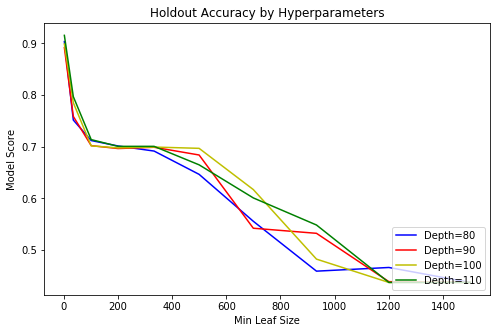

In [113]:
plt.rcParams['figure.figsize'] = 8,5
#Now plot            
fig = plt.figure()
ax=fig.add_subplot(111)

plt.plot(leaves,res[depths[0]], 'b-', label = 'Depth={}'.format(depths[0]))
plt.plot(leaves,res[depths[1]], 'r-', label = 'Depth={}'.format(depths[1]))
plt.plot(leaves,res[depths[2]], 'y-', label = 'Depth={}'.format(depths[2]))
plt.plot(leaves,res[depths[3]], 'g-', label = 'Depth={}'.format(depths[3]))
plt.legend(loc = 4)
ax.set_xlabel('Min Leaf Size')
ax.set_ylabel('Model Score')
plt.title('Holdout Accuracy by Hyperparameters')

the accuracy was getting worse and worse with optimization because the big depth was causing over fittin g
also for most depths we overfit when the leaves get too small

The default value for max_depth is None, which means that each tree will expand until every leaf is pure. A pure leaf is one where all of the data on the leaf comes from the same class.


#### Ilana code

In [30]:
num_bins = [5, 12, 25, 41]
samplesize = [1000, 5000, 10000, 25000, 50000]

for n in num_bins:
    
    max = 1025
    bin_width = max/n

    bins = np.linspace(0,max,n+1)
    labels = list(range(1,n+1))
    
    data = OG.drop(columns = 'DISPATCH_RESPONSE_SECONDS_QY')
    data['INCIDENT_TRAVEL_TM_SECONDS_QY_Bin'] = pd.cut(data['INCIDENT_TRAVEL_TM_SECONDS_QY'],bins,labels=labels)
    data = data.drop(columns = ['INCIDENT_TRAVEL_TM_SECONDS_QY'])
    
    ##REPLACE STRING DEFINING MODEL BELOW##
    row_label = 'RF' + str(n)

    for s in samplesize:
    
        data_sampled = data.sample(n = s)
        
        X = data_sampled.drop(columns = ["INCIDENT_TRAVEL_TM_SECONDS_QY_Bin"])
        Y = data_sampled["INCIDENT_TRAVEL_TM_SECONDS_QY_Bin"]

        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.75)
        
        ## REPLACE MODEL below ##
       
        rf = RandomForestClassifier(criterion='entropy', n_estimators=100)
        rf.fit(X_train, Y_train)
        
        score = rf.score(X_test,Y_test)
                
        ## REPLACE MODEL above ##
        
        summary_dict[row_label].append(score)

In [31]:
summary_dict

{'RF12': [0.46, 0.6104, 0.6644, 0.7192, 0.75984],
 'RF25': [0.276, 0.3768, 0.3728, 0.46352, 0.50152],
 'RF41': [0.164, 0.2088, 0.1976, 0.268, 0.28888],
 'RF5': [0.7, 0.8464, 0.8856, 0.89632, 0.89952]}